In [3]:
import pandas as pd
import numpy as np
train=pd.read_csv('train.csv')
holdout=pd.read_csv('test.csv')
holdout.head(5)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
# %load functions.py
def process_missing(df):
    """Handle various missing values from the data set

    Usage
    ------

    holdout = process_missing(holdout)
    """
    df["Fare"] = df["Fare"].fillna(train["Fare"].mean())
    df["Embarked"] = df["Embarked"].fillna("S")
    return df

def process_age(df):
    """Process the Age column into pre-defined 'bins' 

    Usage
    ------

    train = process_age(train)
    """
    df["Age"] = df["Age"].fillna(-0.5)
    cut_points = [-1,0,5,12,18,35,60,100]
    label_names = ["Missing","Infant","Child","Teenager","Young Adult","Adult","Senior"]
    df["Age_categories"] = pd.cut(df["Age"],cut_points,labels=label_names)
    return df

def process_fare(df):
    """Process the Fare column into pre-defined 'bins' 

    Usage
    ------

    train = process_fare(train)
    """
    cut_points = [-1,12,50,100,1000]
    label_names = ["0-12","12-50","50-100","100+"]
    df["Fare_categories"] = pd.cut(df["Fare"],cut_points,labels=label_names)
    return df

def process_cabin(df):
    """Process the Cabin column into pre-defined 'bins' 

    Usage
    ------

    train process_cabin(train)
    """
    df["Cabin_type"] = df["Cabin"].str[0]
    df["Cabin_type"] = df["Cabin_type"].fillna("Unknown")
    df = df.drop('Cabin',axis=1)
    return df

def process_titles(df):
    """Extract and categorize the title from the name column 

    Usage
    ------

    train = process_titles(train)
    """
    titles = {
        "Mr" :         "Mr",
        "Mme":         "Mrs",
        "Ms":          "Mrs",
        "Mrs" :        "Mrs",
        "Master" :     "Master",
        "Mlle":        "Miss",
        "Miss" :       "Miss",
        "Capt":        "Officer",
        "Col":         "Officer",
        "Major":       "Officer",
        "Dr":          "Officer",
        "Rev":         "Officer",
        "Jonkheer":    "Royalty",
        "Don":         "Royalty",
        "Sir" :        "Royalty",
        "Countess":    "Royalty",
        "Dona":        "Royalty",
        "Lady" :       "Royalty"
    }
    extracted_titles = df["Name"].str.extract(' ([A-Za-z]+)\.',expand=False)
    df["Title"] = extracted_titles.map(titles)
    return df

def create_dummies(df,column_name):
    """Create Dummy Columns (One Hot Encoding) from a single Column

    Usage
    ------

    train = create_dummies(train,"Age")
    """
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    return df

In [7]:
def feature_engg(df):
    df=process_missing(df)
    df=process_age(df)
    df=process_fare(df)
    df=process_titles(df)
    df=process_cabin(df)
    for col in ['Fare_categories','Title','Cabin_type','Sex']:
        df=create_dummies(df,col)
    return df

train=feature_engg(train)
holdout=feature_engg(holdout)


## Exploring the data

In [8]:
explore_cols=['SibSp','Parch','Survived']
explore=train[explore_cols].copy()
explore.describe()


,SibSp,Parch,Survived
count,891.000000,891.000000,891.000000
mean,0.523008,0.381594,0.383838
std,1.102743,0.806057,0.486592
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000
max,8.000000,6.000000,1.000000


In [9]:
explore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 3 columns):
SibSp       891 non-null int64
Parch       891 non-null int64
Survived    891 non-null int64
dtypes: int64(3)
memory usage: 21.0 KB


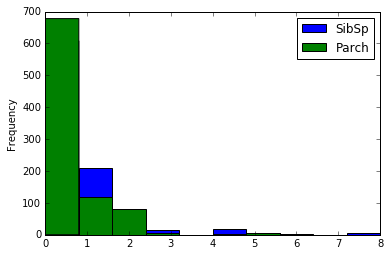

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

explore.drop('Survived',axis=1).plot.hist(bins=10)
plt.show()

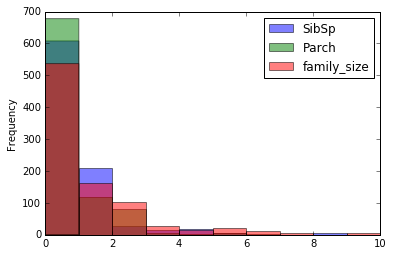

In [11]:
explore['family_size']=explore[['SibSp','Parch']].sum(axis=1)
explore.drop('Survived',axis=1).plot.hist(bins=10,alpha=0.5)
plt.show()

       Survived
SibSp          
0           210
1           112
2            13
3             4
4             3
5             0
8             0


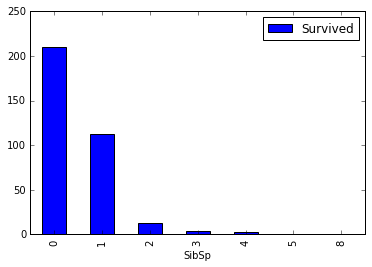

       Survived
Parch          
0           233
1            65
2            40
3             3
4             0
5             1
6             0


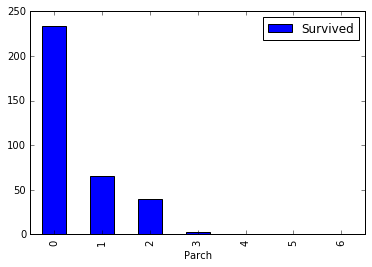

             Survived
family_size          
0                 163
1                  89
2                  59
3                  21
4                   3
5                   3
6                   4
7                   0
10                  0


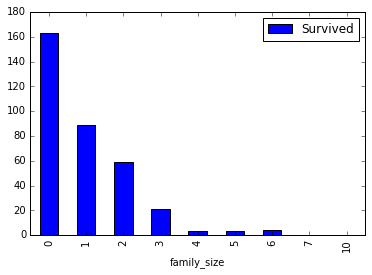

In [12]:
for col in explore.columns.drop("Survived"):
    pivot = explore.pivot_table(index=col,values="Survived",aggfunc=np.sum)
    print(pivot)
    pivot.plot.bar()
   
    plt.show()

\# write down the interpretation

## Adding features

In [15]:
def add_isalone(df):
    df['isalone']=0
    df['family_size']=df[['SibSp','Parch']].sum(axis=1)
    df.loc[(df['family_size']==0),'isalone']=1
    df.drop('family_size',axis=1)
    return df
train=add_isalone(train)
holdout=add_isalone(holdout)

##  Selecting the Best-Performing Features

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import RFECV

def select_features(df):
    df=df.select_dtypes(include=[np.number]).dropna(axis=1)
    all_X=df.drop(['Survived','PassengerId'],axis=1)
    all_y=df['Survived']
    clf=RandomForestClassifier(random_state=1)
    selector=RFECV(clf,cv=10)
    selector.fit(all_X,all_y)
    
    best_columns=list(all_X.columns[selector.support_])
    print("Best columns: \n"+'-'*12+'\n{}\n'.format(best_columns))
    return best_columns
cols=select_features(train)

Best columns: 
------------
['Pclass', 'Age', 'SibSp', 'Parch', 'Fare', 'Title_Master', 'Title_Mr', 'Cabin_type_Unknown', 'Sex_female', 'Sex_male', 'family_size']



/dataquest/system/env/python3/lib/python3.4/site-packages/sklearn/utils/__init__.py:54: FutureWarning:

Conversion of the second argument of issubdtype from `int` to `np.signedinteger` is deprecated. In future, it will be treated as `np.int64 == np.dtype(int).type`.



## Selecting and Tuning Different Algorithms

In [20]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression

def select_model(df,features):
    all_X=df[features]
    all_y=df['Survived']
    
    models=[
        {
            "name":"LogisticRegression",
            "estimator":LogisticRegression(),
            "hyperparameters":
            {
                "solver":['newton-cg','lbfgs','liblinear']
            }
        },
        {
            "name":"KNeighborsClassifier",
            "estimator":KNeighborsClassifier(),
            "hyperparameters":
            {
                "n_neighbors":range(1,20,2),
                "weights":["distance", "uniform"],
                "algorithm": ["ball_tree", "kd_tree", "brute"],
                "p": [1,2],
            },
        },
        {
            "name":"RandomForestClassifier",
            "estimator":RandomForestClassifier(),
            "hyperparameters":
            {
                "n_estimators": [4, 6, 9],
                "criterion": ["entropy", "gini"],
                "max_depth": [2, 5, 10],
                "max_features": ["log2", "sqrt"],
                "min_samples_leaf": [1, 5, 8],
                "min_samples_split": [2, 3, 5]
            }
        }
    ]
    for model in models:
        print(model['name'])
        print("-"*len(model['name']))
        grid=GridSearchCV(model['estimator'],param_grid=model['hyperparameters'],cv=10)
        grid.fit(all_X,all_y)
        model['best_params']=grid.best_params_
        model['best_score']=grid.best_score_
        model['best_estimator']=grid.best_estimator_
        print("Best score:{}".format(model['best_score']))
        print("Best Parameters:{}\n".format(model['best_params']))
        
    return models   

result=select_model(train,cols)

LogisticRegression
------------------
Best score:0.8237934904601572
Best Parameters:{'solver': 'newton-cg'}

KNeighborsClassifier
--------------------
Best score:0.7856341189674523
Best Parameters:{'n_neighbors': 11, 'p': 1, 'algorithm': 'kd_tree', 'weights': 'distance'}

RandomForestClassifier
----------------------
Best score:0.8428731762065096
Best Parameters:{'max_features': 'sqrt', 'n_estimators': 4, 'max_depth': 5, 'min_samples_split': 5, 'min_samples_leaf': 5, 'criterion': 'gini'}



In [21]:
result

[{'best_estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='newton-cg', tol=0.0001,
            verbose=0, warm_start=False),
  'best_params': {'solver': 'newton-cg'},
  'best_score': 0.8237934904601572,
  'estimator': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
            intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
            penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
            verbose=0, warm_start=False),
  'hyperparameters': {'solver': ['newton-cg', 'lbfgs', 'liblinear']},
  'name': 'LogisticRegression'},
 {'best_estimator': KNeighborsClassifier(algorithm='kd_tree', leaf_size=30, metric='minkowski',
             metric_params=None, n_jobs=1, n_neighbors=11, p=1,
             weights='distance'),
  'best_params': {'algorithm': 'kd_tree',
   '

## Making a Submission to Kaggle

In [25]:
def save_submission_file(model,cols,filename="submission.csv"):
    holdout_data = holdout[cols]
    predictions = model.predict(holdout_data)
    
    holdout_ids = holdout["PassengerId"]
    submission_df = {"PassengerId": holdout_ids,
                 "Survived": predictions}
    submission = pd.DataFrame(submission_df)

    submission.to_csv(filename,index=False)

best_rf_model = result[2]["best_estimator"]
save_submission_file(best_rf_model,cols)
    